In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from os.path import expanduser
import seaborn as sns
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches

In [2]:
DETECTS_3DID_NAME = 'minvi-600-2021-12-19-02-35-34'
DETECTS_3DID_DIR = '/media/big-ssd/results-P3856_YHE211-3did/{}/P3856_YHE211/features-3did'.format(DETECTS_3DID_NAME)
DETECTS_3DID_FILE = '{}/exp-P3856_YHE211-run-P3856_YHE211_1_Slot1-1_1_5104-features-3did-dedup.feather'.format(DETECTS_3DID_DIR)

In [3]:
# load the 3DID features classified as identifiable
detects_3did_df = pd.read_feather(DETECTS_3DID_FILE)

In [4]:
detects_3did_df.sample(n=4)

,index,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,inverse_k0_apex,rt_apex,rt_lower,rt_upper,...,voxel_id,voxel_metadata_d,scan_df,scan_r_squared,rt_df,rt_r_squared,number_of_frames,feature_id,prediction,identification_predicted
60805,6119,715.352966,715.398560,139.0,129.0,166.0,1.247066,1924.610107,1921.963379,1931.487549,...,620022735,"{""mz_lower"": 715.3000000000001, ""mz_upper"": 71...","[{""scan"":117,""inverse_k0"":1.2581681013,""intens...",0.998769,"[{""frame_id"":17067,""retention_time_secs"":1910....",0.861527,19,206499,0.265108,True
125905,5626,967.962769,968.024414,336.0,314.0,346.0,1.147394,1672.670532,1667.670532,1678.494141,...,870043479,"{""mz_lower"": 968.5, ""mz_upper"": 968.6, ""scan_l...","[{""scan"":298,""inverse_k0"":1.1666568518,""intens...",0.966304,"[{""frame_id"":14807,""retention_time_secs"":1671....",0.994168,8,404483,0.432381,True
133434,1713,1002.482971,1002.546875,130.0,120.0,140.0,1.251609,2249.558594,2244.794678,2252.735840,...,910011896,"{""mz_lower"": 1003.0, ""mz_upper"": 1003.1, ""scan...","[{""scan"":102,""inverse_k0"":1.2657341957,""intens...",0.995902,"[{""frame_id"":20147,""retention_time_secs"":2236....",0.732104,15,427027,0.213939,True
121300,5474,947.350220,947.410583,380.0,370.0,418.0,1.125068,1611.808960,1606.808960,1616.808960,...,850040729,"{""mz_lower"": 947.3000000000001, ""mz_upper"": 94...","[{""scan"":380,""inverse_k0"":1.1250683069,""intens...",0.000000,"[{""frame_id"":14242,""retention_time_secs"":1611....",0.997335,5,390505,0.601547,True


In [5]:
detects_3did_df.loc[detects_3did_df.scan_apex.idxmax()][['scan_apex','inverse_k0_apex']]

scan_apex             916.0
inverse_k0_apex    0.851201
Name: 1, dtype: object

In [6]:
detects_3did_df.loc[detects_3did_df.scan_apex.idxmin()][['scan_apex','inverse_k0_apex']]

scan_apex              49.0
inverse_k0_apex    1.292446
Name: 86728, dtype: object

In [7]:
(1.292446-0.851201)/(916-49)*20

0.010178662053056517

In [8]:
detects_3did_df.columns

Index(['index', 'mono_mz_lower', 'mono_mz_upper', 'scan_apex', 'scan_lower',
       'scan_upper', 'inverse_k0_apex', 'rt_apex', 'rt_lower', 'rt_upper',
       'intensity_without_saturation_correction',
       'intensity_with_saturation_correction',
       'mono_intensity_adjustment_outcome', 'isotopic_peaks', 'isotope_count',
       'envelope', 'coelution_coefficient', 'mobility_coefficient',
       'voxels_processed', 'monoisotopic_mz', 'charge', 'neutral_mass',
       'monoisotopic_mass', 'feature_intensity', 'deconvolution_envelope',
       'deconvolution_score', 'feature_region_3d_extent', 'voxel_id',
       'voxel_metadata_d', 'scan_df', 'scan_r_squared', 'rt_df',
       'rt_r_squared', 'number_of_frames', 'feature_id', 'prediction',
       'identification_predicted'],
      dtype='object')

In [9]:
biosaur_name = 'P3856_YHE211_1_Slot1-1_1_5104-denoised-biosaur-mini-100-ac-25-minl-6.features.tsv'
DETECTS_BIOSAUR_FILE = '{}/{}'.format(expanduser('~'), biosaur_name)


In [10]:
detects_biosaur_df = pd.read_csv(DETECTS_BIOSAUR_FILE, sep='\\t', engine='python')

In [11]:
detects_biosaur_df = detects_biosaur_df[(detects_biosaur_df.nIsotopes >= 3)]

In [12]:
detects_biosaur_df.loc[detects_biosaur_df.ion_mobility.idxmax()].ion_mobility

1.2843854495463003

In [13]:
detects_biosaur_df.columns

Index(['massCalib', 'rtApex', 'intensityApex', 'charge', 'nIsotopes', 'nScans',
       'sulfur', 'cos_corr_1', 'cos_corr_2', 'diff_for_output',
       'corr_fill_zero', 'intensity_1', 'scan_id_1', 'mz_std_1', 'intensity_2',
       'scan_id_2', 'mz_std_2', 'mz', 'rtStart', 'rtEnd', 'id', 'ion_mobility',
       'FAIMS', 'targeted_mode'],
      dtype='object')

In [14]:
# corresponds to about the same scan tolerance as 20 scans over 910
DUP_INVERSE_K0 = (detects_3did_df.inverse_k0_apex.max()-detects_3did_df.inverse_k0_apex.min())*(20/910) * 4
DUP_INVERSE_K0 = 0.05

In [22]:
# definition of a duplicate feature
DUP_MZ_TOLERANCE_PPM = 25
DUP_RT_TOLERANCE = 5

In [23]:
# set up dup definitions
MZ_TOLERANCE_PERCENT = DUP_MZ_TOLERANCE_PPM * 10**-4
detects_biosaur_df['dup_mz_ppm_tolerance'] = detects_biosaur_df.mz * MZ_TOLERANCE_PERCENT / 100
detects_biosaur_df['dup_mz_lower'] = detects_biosaur_df.mz - detects_biosaur_df.dup_mz_ppm_tolerance
detects_biosaur_df['dup_mz_upper'] = detects_biosaur_df.mz + detects_biosaur_df.dup_mz_ppm_tolerance
detects_biosaur_df['dup_inverse_k0_lower'] = detects_biosaur_df.ion_mobility - DUP_INVERSE_K0
detects_biosaur_df['dup_inverse_k0_upper'] = detects_biosaur_df.ion_mobility + DUP_INVERSE_K0
detects_biosaur_df['dup_rt_lower'] = detects_biosaur_df.rtApex - DUP_RT_TOLERANCE
detects_biosaur_df['dup_rt_upper'] = detects_biosaur_df.rtApex + DUP_RT_TOLERANCE

In [24]:
# find the features detected by 3DID and Biosaur
matched_features_3did = set()
matched_features_biosaur = set()

for row in detects_3did_df.itertuples():
    df = detects_biosaur_df[(row.charge == detects_biosaur_df.charge) & (row.monoisotopic_mz >= detects_biosaur_df.dup_mz_lower) & (row.monoisotopic_mz <= detects_biosaur_df.dup_mz_upper) & (row.inverse_k0_apex >= detects_biosaur_df.dup_inverse_k0_lower) & (row.inverse_k0_apex <= detects_biosaur_df.dup_inverse_k0_upper) & (row.rt_apex >= detects_biosaur_df.dup_rt_lower) & (row.rt_apex <= detects_biosaur_df.dup_rt_upper)]
    if len(df) > 0:
        matched_features_3did.update(set([row.feature_id]))
        matched_features_biosaur.update(set(df.id.tolist()))

In [25]:
contained_in_3did_not_biosaur = len(detects_3did_df) - len(matched_features_3did)
contained_in_biosaur_not_3did = len(detects_biosaur_df) - len(matched_features_biosaur)
contained_in_both = len(matched_features_biosaur)

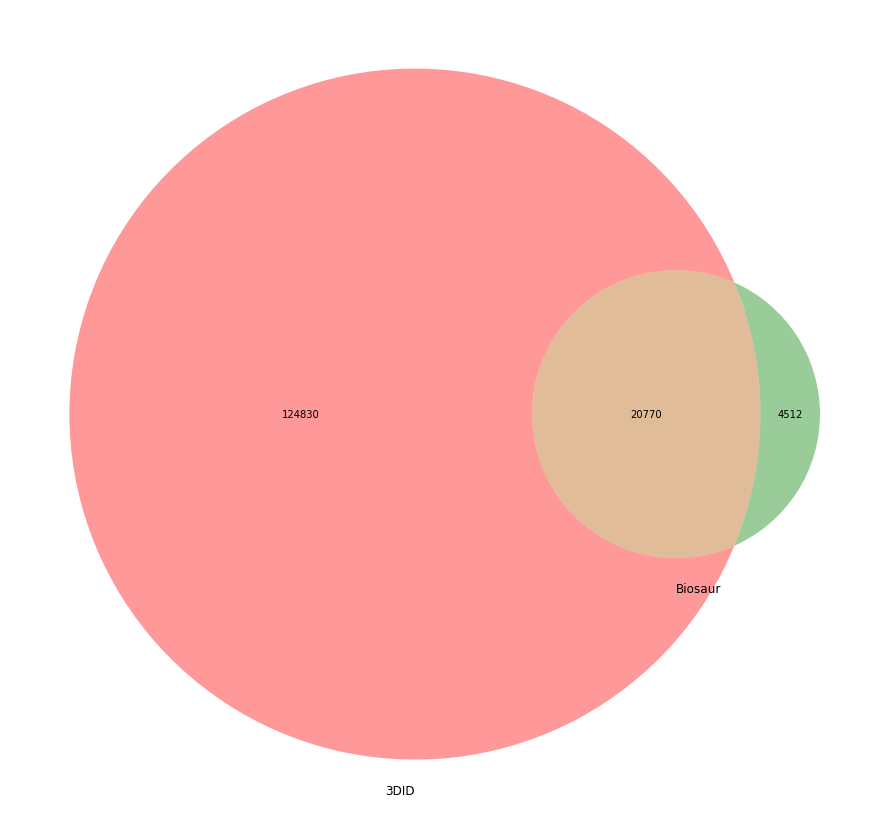

In [26]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(20)

plt.margins(0.06)

venn2(subsets = (contained_in_3did_not_biosaur, contained_in_biosaur_not_3did, contained_in_both), set_labels = ('3DID', 'Biosaur'))
plt.show()

In [27]:
matched_3did_df = detects_3did_df[detects_3did_df.feature_id.isin(matched_features_3did)]

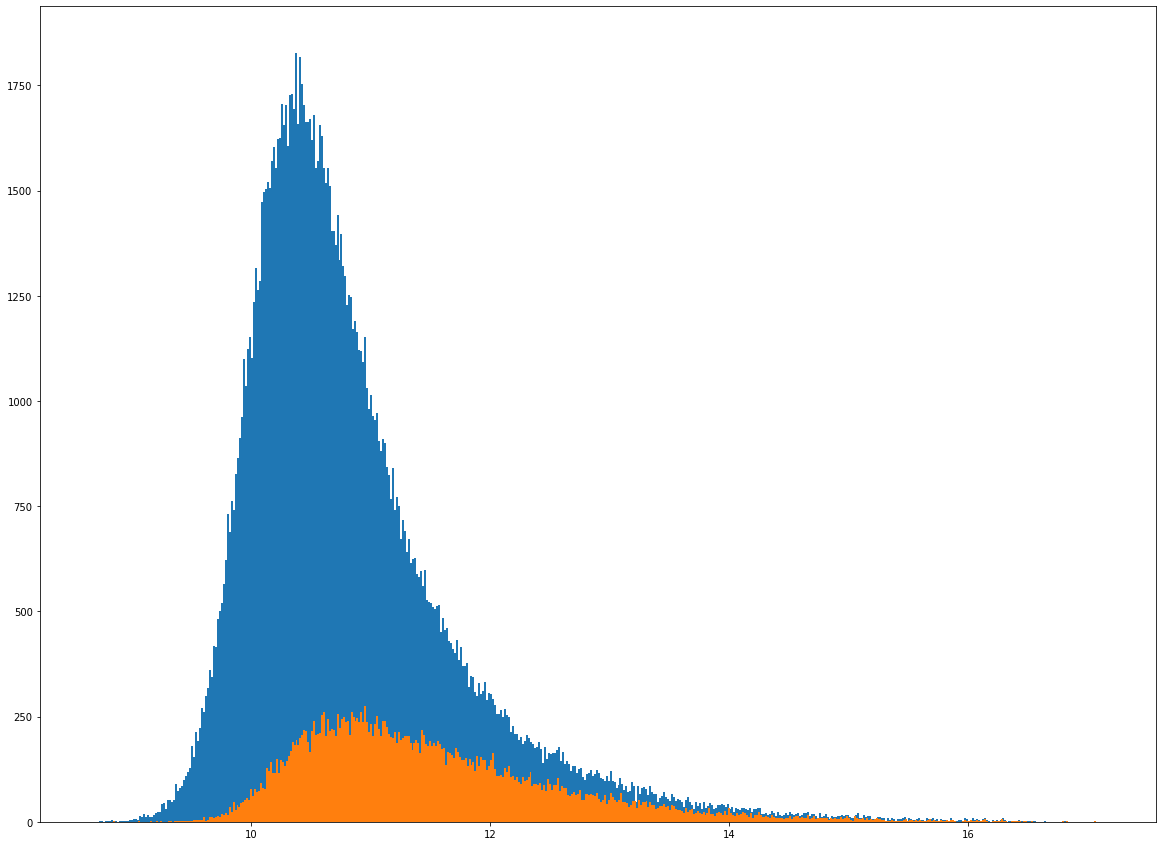

In [28]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(20)

plt.margins(0.06)

bins = 500
values = np.log2(detects_3did_df.feature_intensity)
y, x, _ = ax.hist(values, bins=bins, label='detected')

values = np.log2(matched_3did_df.feature_intensity)
y, x, _ = ax.hist(values, bins=bins, label='matched')

plt.show()